# Исследование рынка общественного питания в Москве.

Нам дана информация о заведениях общественного питания в Москве. Наша задача проанализировать данный рынок и презентовать результаты инвесторам.

###### Данное исследование разделим на несколько частей.

##### Часть 1. Изучение общей информации:
* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)

##### Часть 2. Подготовка данных:
* [1. Приведение данных к нужным типам, изменение названий столбцов.](#2-bullet)

##### Часть 3. Анализ данных:
* [1. Анализ рынка.](#3-bullet)

##### Часть 4. Выводы :
* [1. Общий вывод.](#6-bullet)

<a id='1-bullet'></a>

## Изучение общей информации о таблице.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/datasets/rest_data.csv')
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
df=df.drop_duplicates()

### Вывод:

Итак, у нас чистая таблица, готовая к исследованию.

<a id='3-bullet'></a>

## Анализ данных

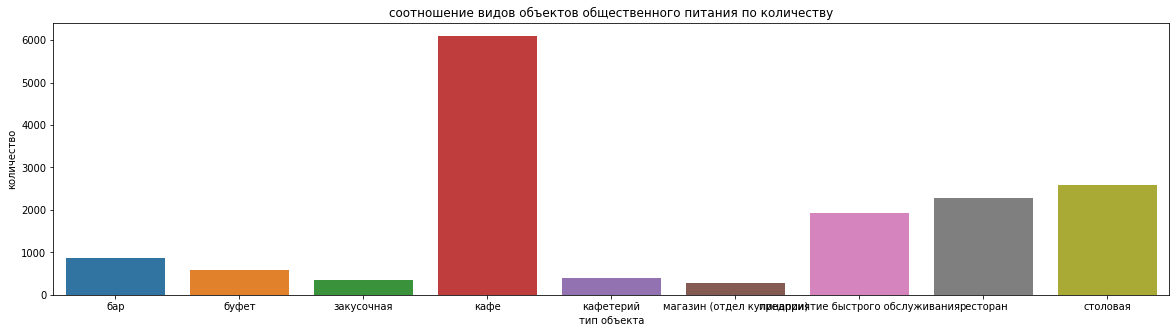

In [5]:
plt.figure(figsize=(20, 5))
sns.barplot(x='object_type', y='id',data=df.groupby('object_type')['id'].count().reset_index())
plt.title("соотношение видов объектов общественного питания по количеству")
plt.xlabel('тип объекта')
plt.ylabel("количество")
plt.show()

In [6]:
df.groupby('object_type')['id'].count().reset_index()

,object_type,id
0,бар,856
1,буфет,585
2,закусочная,360
3,кафе,6099
4,кафетерий,398
5,магазин (отдел кулинарии),273
6,предприятие быстрого обслуживания,1923
7,ресторан,2285
8,столовая,2587


Видим, что в столице больше всего кафешек. Немного отстают столовые, рестораны и рестораны быстрого обслуживания.

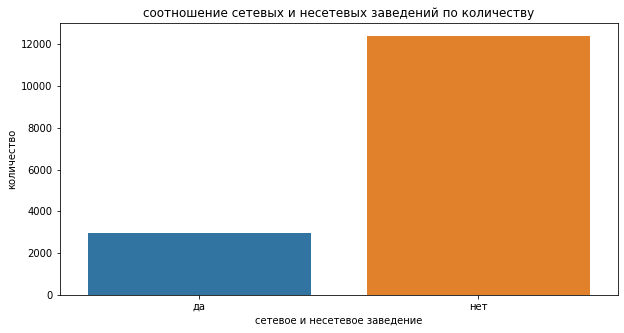

In [7]:
plt.figure(figsize=(10, 5))
sns.barplot(x='chain', y='id',data=df.groupby('chain')['id'].count().reset_index())
plt.title("соотношение сетевых и несетевых заведений по количеству")
plt.xlabel('сетевое и несетевое заведение')
plt.ylabel("количество")
plt.show()

Итак, большая часть заведений несетивые, посмотрим на ситуацию более детально.

In [8]:
chain=df.groupby(['chain', 'object_type'])['id'].count().reset_index().merge(df.groupby('object_type')['id'].count(), on='object_type', how='right')
chain['per_cent']=chain['id_x']/chain['id_y']*100
chain

,chain,object_type,id_x,id_y,per_cent
0,да,бар,37,856,4.322430
1,нет,бар,819,856,95.677570
2,да,буфет,11,585,1.880342
3,нет,буфет,574,585,98.119658
4,да,закусочная,56,360,15.555556
5,нет,закусочная,304,360,84.444444
6,да,кафе,1396,6099,22.888998
7,нет,кафе,4703,6099,77.111002
8,да,кафетерий,52,398,13.065327
9,нет,кафетерий,346,398,86.934673


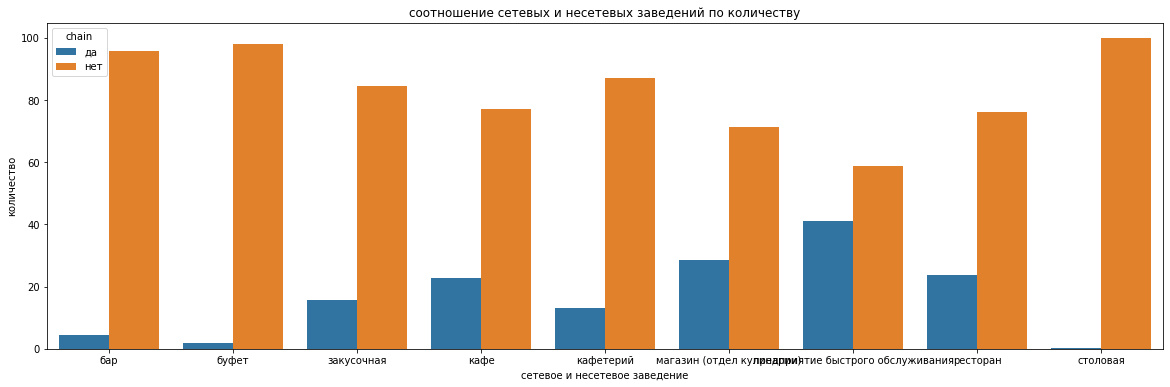

In [9]:
plt.figure(figsize=(20, 6))
sns.barplot(x='object_type', y='per_cent',data=chain, hue='chain')
plt.title("соотношение сетевых и несетевых заведений по количеству")
plt.xlabel('сетевое и несетевое заведение')
plt.ylabel("количество")
plt.show()

Заметим, что для ресторанов быстрого обслуживания и отделов кулинарии характерно сетевое распространение. 

In [10]:
setev=df[df['chain']=='да']

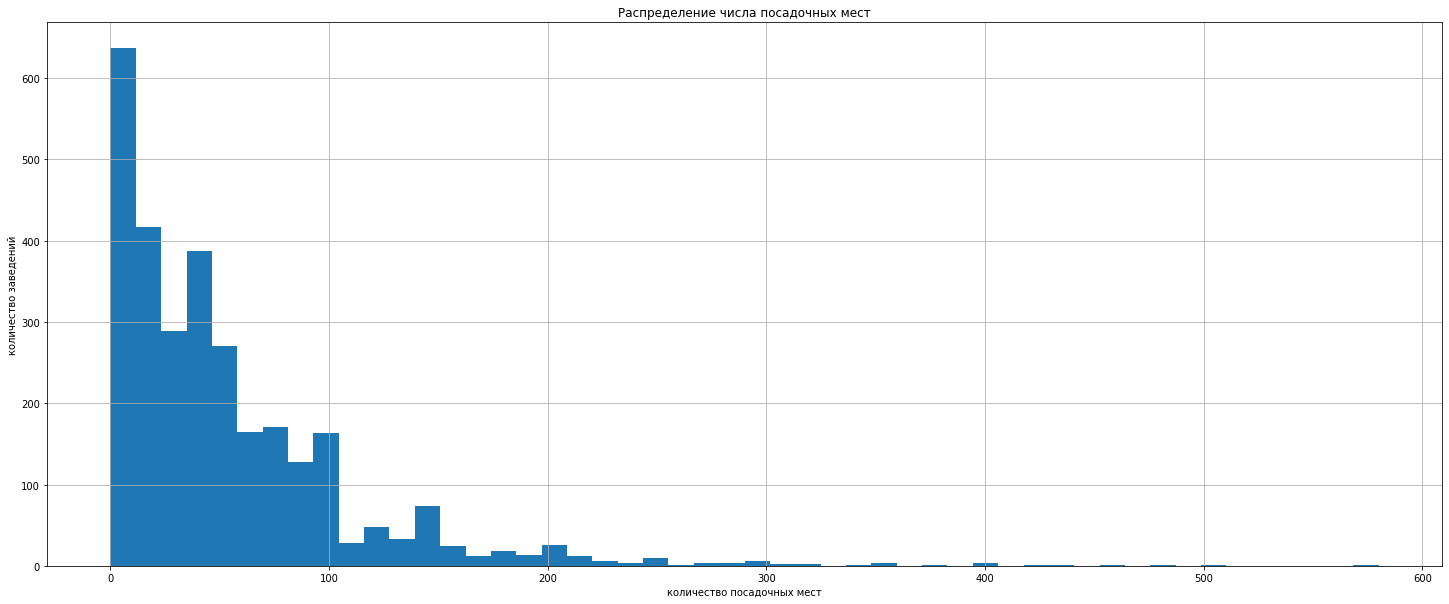

In [11]:
plt.figure(figsize=(25, 10))
setev['number'].hist(bins=50)
plt.title('Распределение числа посадочных мест')
plt.xlabel('количество посадочных мест')
plt.ylabel("количество заведений")
plt.show()

Рассмотрим только сетивые объекты питания.
</div>
Видим, что подавляющая часть с небольшим числом посадочных мест и мало заведений с большим количеством посадочных мест?

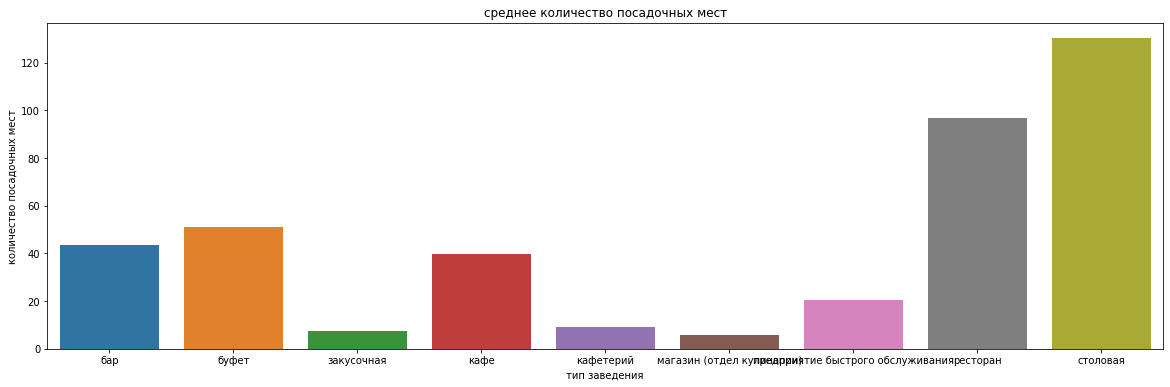

In [12]:
plt.figure(figsize=(20, 6))
sns.barplot(x='object_type', y='number',data=df.groupby('object_type')['number'].mean().reset_index())
plt.title("среднее количество посадочных мест")
plt.xlabel('тип заведения')
plt.ylabel("количество посадочных мест")
plt.show()

In [13]:
df.groupby('object_type')['number'].mean().reset_index()

,object_type,number
0,бар,43.494159
1,буфет,51.129915
2,закусочная,7.608333
3,кафе,39.716019
4,кафетерий,9.123116
5,магазин (отдел кулинарии),5.589744
6,предприятие быстрого обслуживания,20.552262
7,ресторан,96.834136
8,столовая,130.246618


Итак, самое большое среднее значение посадочных мест у столовой. Это объяснимо, так как в столовые ходят большое количество людей на завтрак, обед и ужин. 
</div>

Рестораны тоже не отстают от столовых, так как многие рестораны расчитываются на проведение банкетов.
</div>

Те объекты, у которых среднее число очень низкое, расчитаны на то, что человек еду возьмет с собой.

In [14]:
df['street'] = df['address'].str.extract('(([А-я0-9\s\-]+)?(улица|переулок|шоссе|проспект|площадь|проезд|село|Проезд|аллея|бульвар|набережная|тупик|линия)([А-я0-9\s\-]+)?)')[0]
df['street']=df['street'].str.strip()

In [15]:
df.groupby('street')['id'].count().sort_values(ascending=False).head(10)

street
проспект Мира             204
Профсоюзная улица         183
Ленинградский проспект    173
Пресненская набережная    167
Варшавское шоссе          165
Ленинский проспект        148
проспект Вернадского      132
Кутузовский проспект      114
Каширское шоссе           112
Кировоградская улица      110
Name: id, dtype: int64

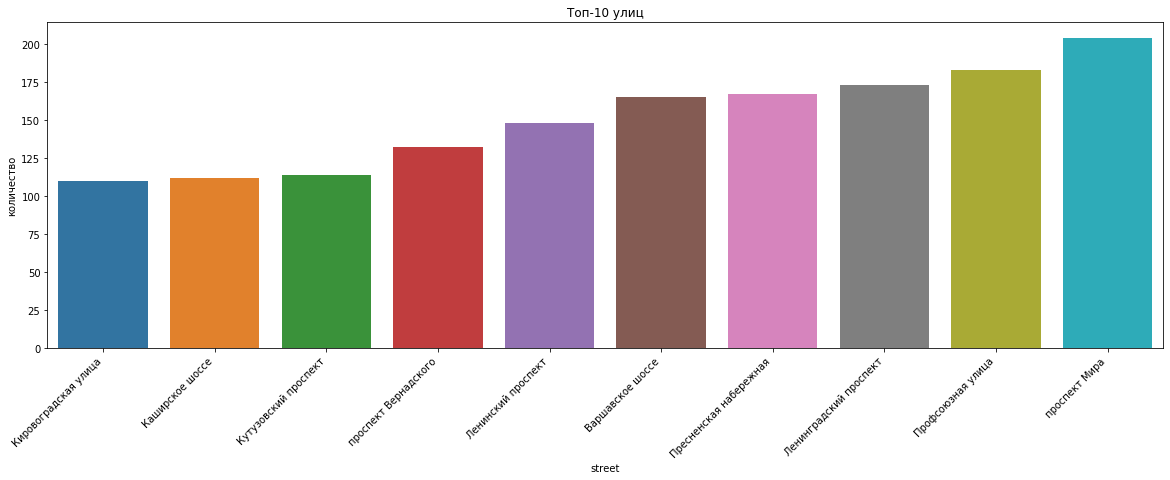

In [16]:

fig, ax = plt.subplots(figsize = (20,6))    
fig = sns.barplot(x='street', y='id',data=df.groupby('street')['id'].count().sort_values().tail(10).reset_index(),ci = None, ax=ax )
plt.title('Топ-10 улиц')
plt.ylabel('количество')
x_street = df.groupby('street')['id'].count().sort_values().tail(10).reset_index()['street']
ax.set_xticklabels(labels=x_street, rotation=45, ha='right')
plt.show()

Итак, мы нашли топ-10 улиц с самым большим количеством заведений общественного питания. Но интересен тот факт, что часть этих улиц очень длинные, поэтому у них такое большое количество объектов. Давайте выясним так ли это.

In [17]:
districts = pd.read_csv('http://hubofdata.ru/storage/f/2013-10-22T09%3A25%3A27.793Z/mosgaz-streets.csv')
districts.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [18]:
districts=districts.rename(columns={'streetname': 'street'})


In [19]:
data = pd.merge(df, districts, on='street',how='left')
data=data.dropna()

In [20]:
streets=df.groupby('street')['id'].count().sort_values().tail(10)
top_10=data[data['street'].isin(streets.index)]

In [21]:
top_10.groupby('street')['area'].nunique()

street
Варшавское шоссе          8
Каширское шоссе           4
Кировоградская улица      3
Кутузовский проспект      2
Ленинградский проспект    4
Ленинский проспект        8
Пресненская набережная    1
Профсоюзная улица         6
проспект Вернадского      5
проспект Мира             7
Name: area, dtype: int64

In [22]:
top_10.groupby('street')['okrug'].nunique().sort_values()

street
Каширское шоссе           1
Кировоградская улица      1
Кутузовский проспект      1
Ленинградский проспект    1
Пресненская набережная    1
Профсоюзная улица         1
Варшавское шоссе          2
проспект Вернадского      2
проспект Мира             2
Ленинский проспект        4
Name: okrug, dtype: int64

Видим, что только Пресненская набережная находится в одном районе, все остальные проходят через несколько районов, а Ленинский проспект проходит даже через 4 округа. Поэтому я предлагаю составить топ из улиц, находящихся в одном районе.

In [23]:
street_1=data.groupby('street')['area'].nunique().reset_index()

In [24]:
street_1=street_1[street_1['area']==1]
street_1=street_1['street'].unique()
street_1=data[data['street'].isin(street_1)]

In [25]:
street_1.groupby('street')['id'].count().sort_values(ascending=False).head(10)

street
Пресненская набережная     167
Ходынский бульвар          102
улица Новый Арбат           92
улица Ленинская Слобода     89
Пятницкая улица             80
улица Арбат                 77
улица Покровка              77
Тверская улица              68
Автозаводская улица         67
Ярославское шоссе           65
Name: id, dtype: int64

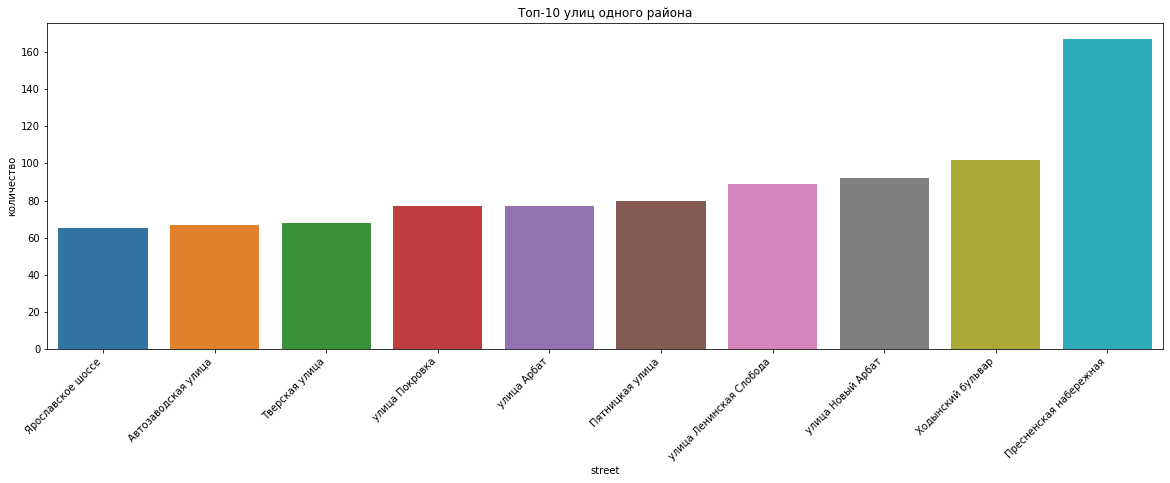

In [26]:
fig, ax = plt.subplots(figsize = (20,6))    
fig = sns.barplot(x='street', y='id',data=street_1.groupby('street')['id'].count().sort_values().tail(10).reset_index(),ci = None, ax=ax )
plt.title('Топ-10 улиц одного района')
plt.ylabel('количество')
x_street = street_1.groupby('street')['id'].count().sort_values().tail(10).reset_index()['street']
ax.set_xticklabels(labels=x_street, rotation=45, ha='right')
plt.show()

Мы составили топ улиц самых популярных среди "ресторанных" бизнесменов. Заметим, что только Пресненская набережная осталась из старого топа и показывает самые хорошие результаты.

In [27]:
streets=street_1.groupby('street')['id'].count().sort_values().tail(10)
top_10=street_1[street_1['street'].isin(streets.index)]
top_10.groupby('street')['area'].unique()

street
Автозаводская улица          [Даниловский район]
Пресненская набережная       [Пресненский район]
Пятницкая улица            [Район Замоскворечье]
Тверская улица                  [Тверской район]
Ходынский бульвар            [Хорошевский район]
Ярославское шоссе            [Ярославский Район]
улица Арбат                        [Район Арбат]
улица Ленинская Слобода      [Даниловский район]
улица Новый Арбат                  [Район Арбат]
улица Покровка                 [Басманный район]
Name: area, dtype: object

In [28]:
top_10.groupby('street')['okrug'].unique()

street
Автозаводская улица         [ЮАО]
Пресненская набережная      [ЦАО]
Пятницкая улица             [ЦАО]
Тверская улица              [ЦАО]
Ходынский бульвар           [САО]
Ярославское шоссе          [СВАО]
улица Арбат                 [ЦАО]
улица Ленинская Слобода     [ЮАО]
улица Новый Арбат           [ЦАО]
улица Покровка              [ЦАО]
Name: okrug, dtype: object

Видим, что чуть больше половины улиц находится в ЦАО.

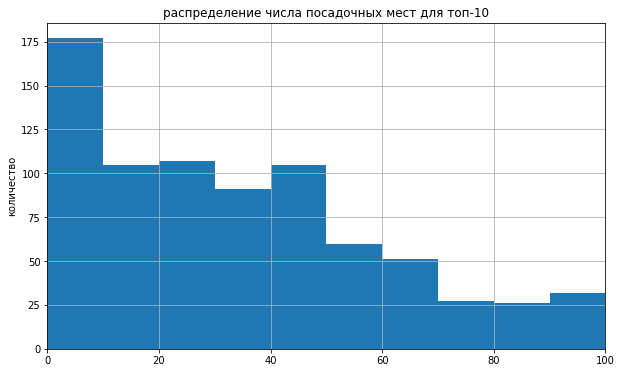

In [29]:
fig, ax = plt.subplots(figsize = (10,6))    
top_10['number'].hist(bins=50)
plt.title('распределение числа посадочных мест для топ-10')
plt.ylabel('количество')
plt.xlim(0,100)
plt.show()

Для нашего топа характерно 0-60 посадочных мест.

In [30]:
streets=df.groupby('street')['id'].count().reset_index()
streets=streets[streets['id']>1]
streets=streets['street'].unique()
top=df[df['street'].isin(streets)]

In [31]:
cafe=top.groupby('street')['object_type'].nunique().reset_index()

In [32]:
cafe[cafe['object_type']==1]['street'].count()

137

137 улицы с одним типом общественного питания.

<a id='4-bullet'></a>

## Общий вывод:

Итак, по данным результатам мы можем сделать вывод, что кафе 20-40 посадочных мест в центральном округе Москвы является самым распространенным явлением, поэтому мы можем как попробовать сделать похожее на волне популярности таких мест, так и наоборот создать что-то аутентичное (ресторан), но все равно рассчитывать на центр Москвы и небольшое количество посадочных мест.